# Aim of this notebook

In this notebook I want to go through each step of EDA (Exploratory Data Analysis) to gain more practical experience with this statistical tool

## About The Rollercoaster Database
This data contains information about over 1000 rollercoasters. Information was scraped from wikipedia.

https://www.kaggle.com/datasets/robikscube/rollercoaster-database/

## Importing and configuring libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

## Loading the Dataset

In [4]:
df = pd.read_csv('./data/coaster_db.csv')

## Step 1: Data Understanding
- shape of the dataset - Dataframe `shape`
- examples of different observations - `head` and `tail`
- types of data - `dtypes`
- basic information about the distribution of numerical features - `describe`

In [5]:
print(df.shape)

(1087, 56)


In [6]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [7]:
print(df.dtypes)

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

The dataset consists of 56 columns. Not all of them are in any way usefull for our analysis.

As wee can see there are also some columns describing the same value ex.: `Speed`, `speed1`, `speed2`, `speed1_value`, `speed_mph`

We can remove the redundant columns for clearness of the dataset and only leave one - in case of speed, we will only leave `speed_mph`

## Step 2: Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

### Simplifying the data (Dropping irrelevant columns)

In [8]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [9]:

choosen_columns = [
  'coaster_name',
  # 'Length', 'Speed', 
  'Location', 'Status', 
  # 'Opening date', 'Type',
  'Manufacturer',
  # 'Height restriction', 'Model', 'Height',
  # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
  # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
  # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
  # 'Track layout', 'Fastrack available', 'Soft opening date.1',
  # 'Closing date', 'Opened', 'Replaced by', 'Website',
  # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
  # 'Single rider line available', 'Restraint Style',
  # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
  'year_introduced', 'latitude', 'longitude', 'Type_Main',
  'opening_date_clean', 
  # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
  'speed_mph',
  # 'height_value', 'height_unit', 
  'height_ft', 'Inversions_clean', 'Gforce_clean'
]

df = df[choosen_columns]

In [10]:
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


### Changing Types

In [11]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [12]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [13]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

### Renaming Columns

In [14]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [15]:
df = df.rename(columns={
  'coaster_name': 'Coaster_Name',
  'year_introduced': 'Year_Introduced',
  'latitude': 'Latitude',
  'longitude': 'Longitude',
  'opening_date_clean': 'Opening_Date',
  'speed_mph': 'Speed_mph',
  'height_ft': 'Height_ft',
  'Inversions_clean': 'Inversions',
  'Gforce_clean': 'Gforce',
})

### Dealing with NaNs

In [16]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

### Dealing with Duplicates

In [17]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


Good, no fully duplicated rows found

In [18]:
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


But, there are duplicated occurences of the same coasters ("Coaster_Name" col)

I will now examine why is that happening

In [19]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [20]:
df.query('Coaster_Name == "Little Dipper (Conneaut Lake Park)"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
69,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,1950,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN


In [21]:
df.query('Coaster_Name == "American Dreier Looping"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
422,American Dreier Looping,Other,NaN,Anton Schwarzkopf,1997,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
686,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2005,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
738,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2007,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


##### Conclusion
By looking at few by-hand selected coasters, it seems like the only difference between duplicated rows is `Year_Introduced` column.
I can assume, it is due to some closing and then reopening cycles.

Let's focus on the oldest (with smallest year) observations only

##### Solution

I dropped all duplicated rows with the same coaster name, location and opening date

In [22]:
# Remember to reset indexes so there will not be any empty spaces within dataframe
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop=True)

In [23]:
df.shape

(990, 13)

## Step 3: Feature Understanding
(univariate analysis)
- Plotting feature distributions
  - Histogram
  - KDE
  - Boxplot

### Plotting different feature distributions

#### Year of Introduction

Text(0.5, 1.0, 'All Years Coasters Introduced')

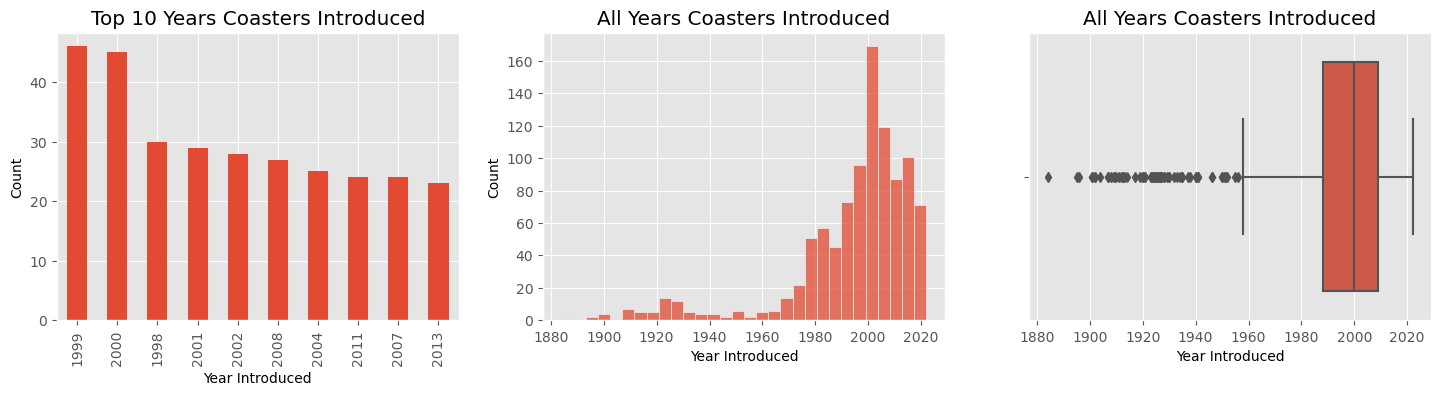

In [24]:
f, axs = plt.subplots(1, 3, figsize=(15, 4))
f.tight_layout(pad=3)

df['Year_Introduced'].value_counts() \
  .head(10) \
  .plot(kind='bar', ax=axs[0])

axs[0].set_xlabel("Year Introduced")
axs[0].set_ylabel("Count")
axs[0].set_title("Top 10 Years Coasters Introduced")


sns.histplot(data=df, x="Year_Introduced", bins=30, ax=axs[1])
axs[1].set_xlabel("Year Introduced")
axs[1].set_title("All Years Coasters Introduced")

sns.boxplot(data=df, x="Year_Introduced", ax=axs[2])
axs[2].set_xlabel("Year Introduced")
axs[2].set_title("All Years Coasters Introduced")

#### Speed of the Coaster

Text(0.5, 1.0, 'Distribution of Coaster Speed (mph)')

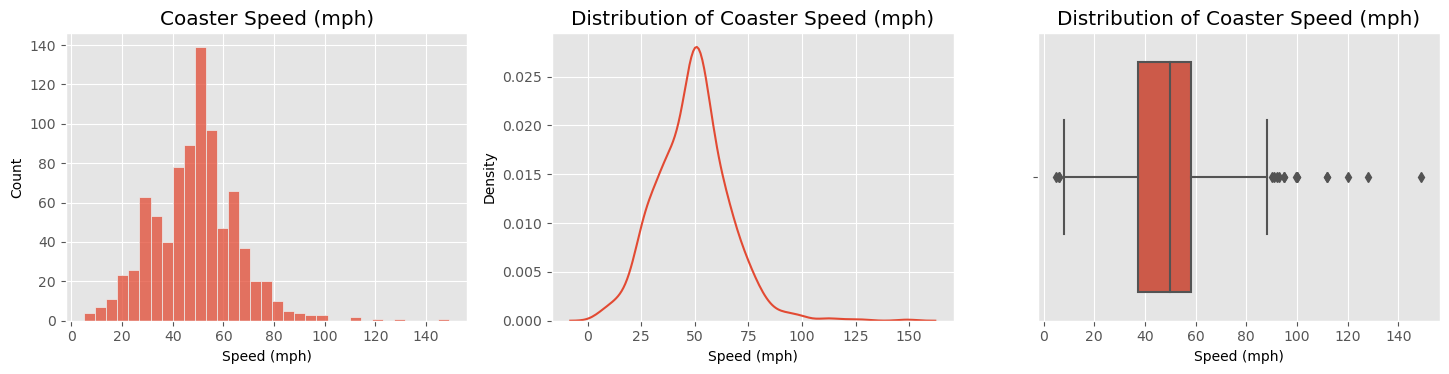

In [25]:
f, axs = plt.subplots(1, 3, figsize=(15, 4))
f.tight_layout(pad=3)

sns.histplot(data=df, x="Speed_mph", ax=axs[0])
axs[0].set_xlabel("Speed (mph)")
axs[0].set_title("Coaster Speed (mph)")

sns.kdeplot(data=df, x="Speed_mph", ax=axs[1])
axs[1].set_xlabel("Speed (mph)")
axs[1].set_title("Distribution of Coaster Speed (mph)")

sns.boxplot(data=df, x="Speed_mph", ax=axs[2])
axs[2].set_xlabel("Speed (mph)")
axs[2].set_title("Distribution of Coaster Speed (mph)")

#### Height of the Coaster

Text(0.5, 1.0, 'Distribution of the Coaster Height (ft)')

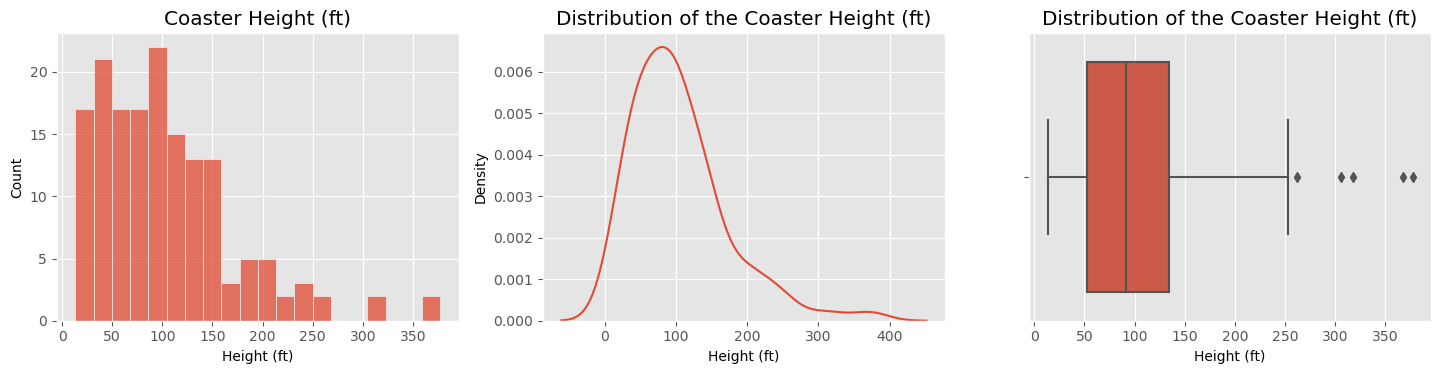

In [26]:
f, axs = plt.subplots(1, 3, figsize=(15, 4))
f.tight_layout(pad=3)

sns.histplot(data=df, x="Height_ft", bins=20, ax=axs[0])
axs[0].set_xlabel("Height (ft)")
axs[0].set_title("Coaster Height (ft)")

sns.kdeplot(data=df, x="Height_ft", ax=axs[1])
axs[1].set_xlabel("Height (ft)")
axs[1].set_title("Distribution of the Coaster Height (ft)")

sns.boxplot(data=df, x="Height_ft", ax=axs[2])
axs[2].set_xlabel("Height (ft)")
axs[2].set_title("Distribution of the Coaster Height (ft)")

#### Top G Force of the Coaster

Text(0.5, 1.0, 'Distribution of the Top Coaster G Force')

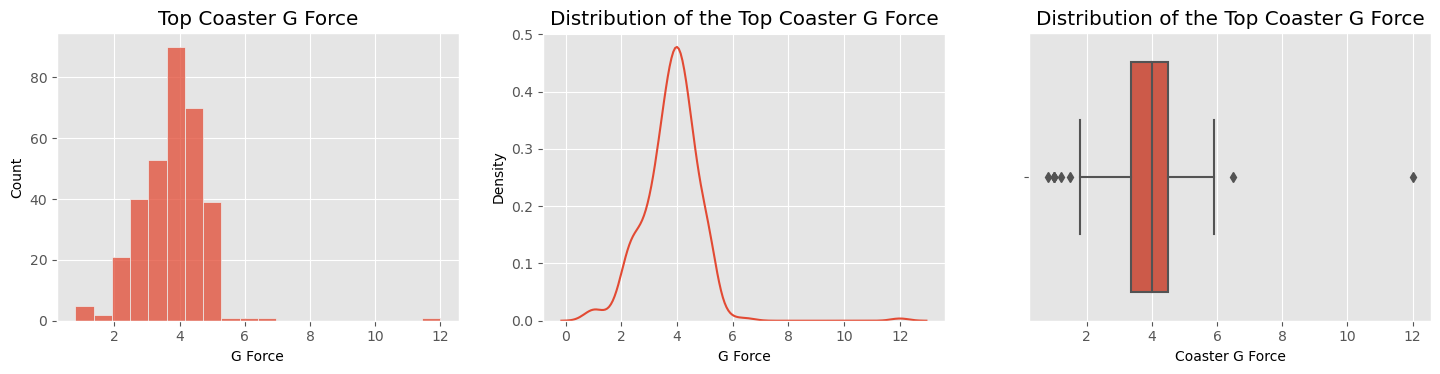

In [27]:
f, axs = plt.subplots(1, 3, figsize=(15, 4))
f.tight_layout(pad=3)

sns.histplot(data=df, x="Gforce", bins=20, ax=axs[0])
axs[0].set_xlabel("G Force")
axs[0].set_title("Top Coaster G Force")

sns.kdeplot(data=df, x="Gforce", ax=axs[1])
axs[1].set_xlabel("G Force")
axs[1].set_title("Distribution of the Top Coaster G Force")

sns.boxplot(data=df, x="Gforce", ax=axs[2])
axs[2].set_xlabel("Coaster G Force")
axs[2].set_title("Distribution of the Top Coaster G Force")

#### Construction Material of the Coaster

Text(0.5, 1.0, 'Coaster Construction Materials')

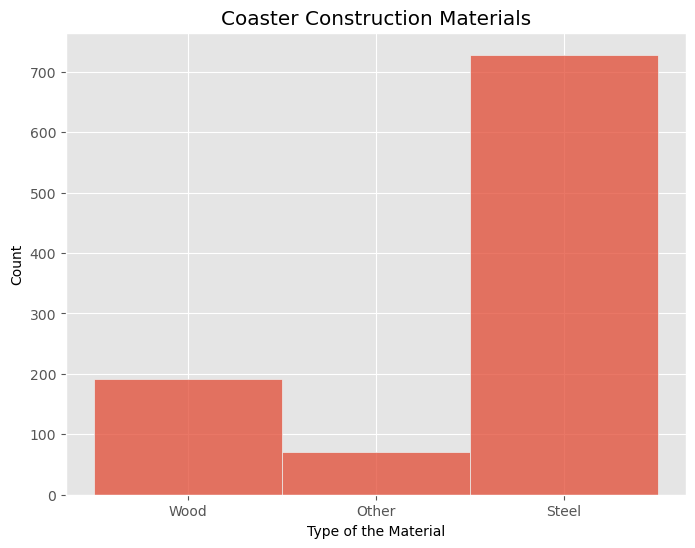

In [28]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.histplot(data=df, x="Type_Main", bins=20, ax=ax)
ax.set_xlabel("Type of the Material")
ax.set_title("Coaster Construction Materials")


## Step 4: Feature Relationships
(multivariate analysis)
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupedby Comparision

In [29]:
quantitative_features = ['Year_Introduced', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']

### Plotting the data

#### Scatterplot of Speed vs Height vs Year of Introduction 

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

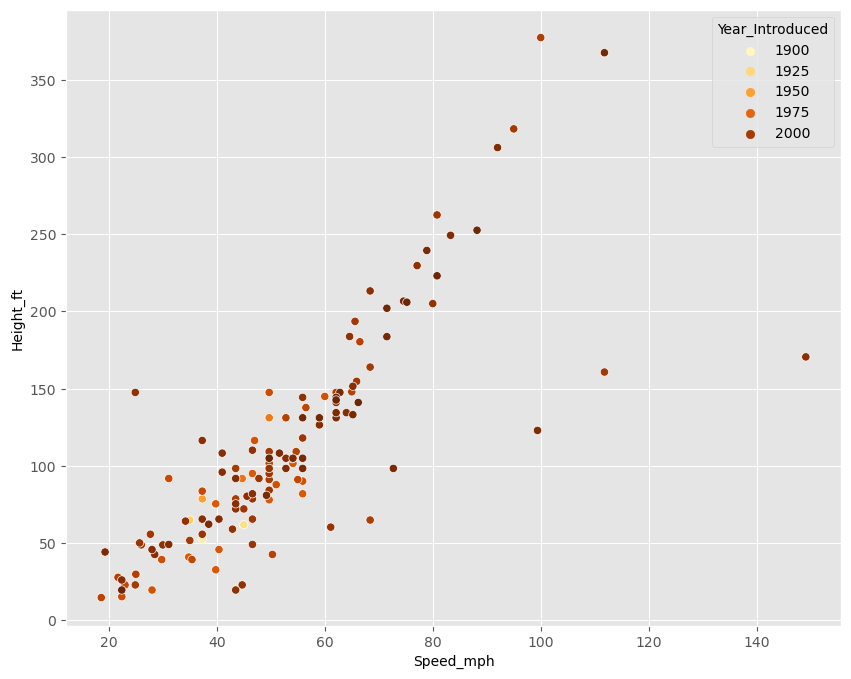

In [30]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.scatterplot(
  data=df,
  x="Speed_mph",
  y="Height_ft",
  hue="Year_Introduced",
  palette='YlOrBr',
  ax=ax
)

#### Pairplot of Quantitative Features

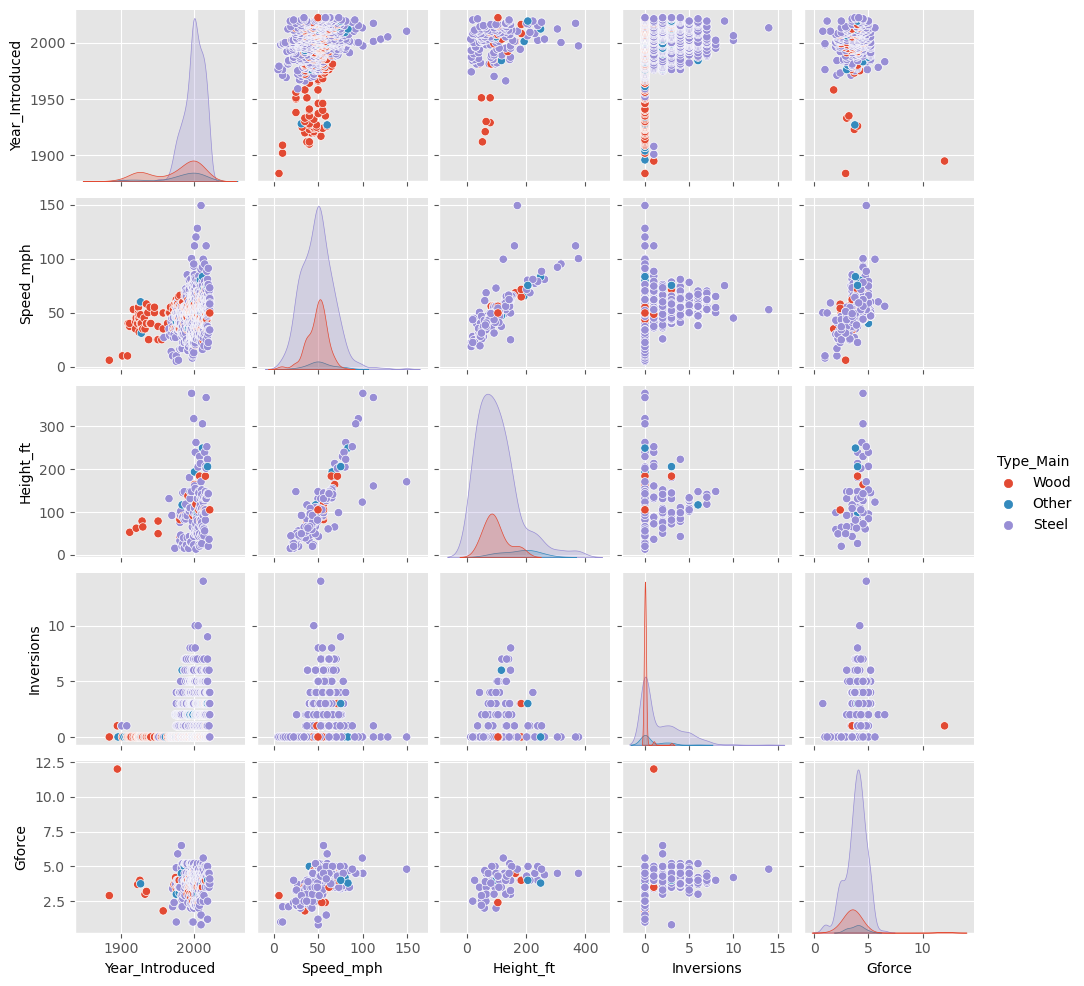

In [31]:
sns.pairplot(data=df, vars=quantitative_features, hue='Type_Main', height=2)

#### Construction Material vs rest of parameters

Text(0.5, 0, 'Construction Material')

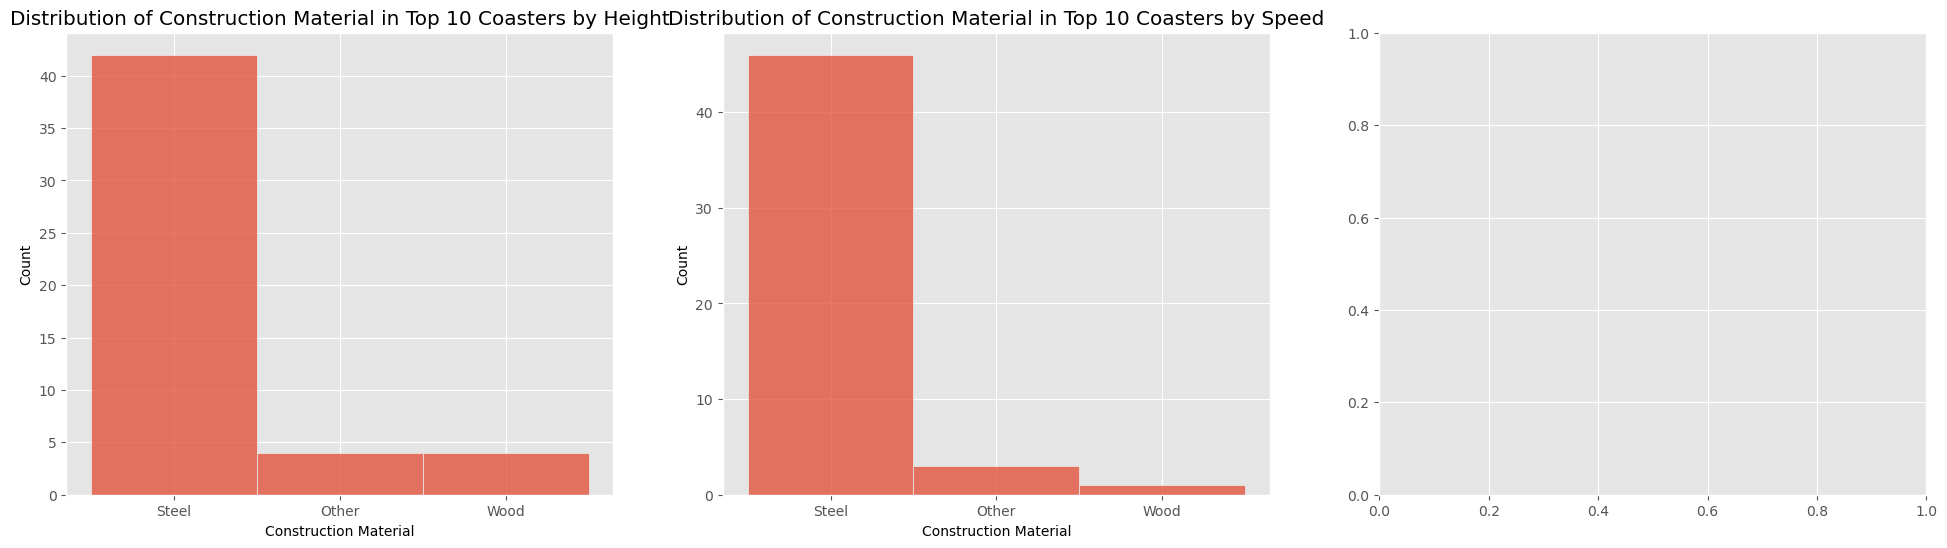

In [80]:
f, axs = plt.subplots(1, 3, figsize=(24, 6))

TOP_COUNT = 50
top_height = df.dropna(subset=['Height_ft']).sort_values(by='Height_ft', ascending=False).head(TOP_COUNT)

sns.histplot(
  data=top_height,
  x="Type_Main",
  ax=axs[0]
)
axs[0].set_title("Distribution of Construction Material in Top 10 Coasters by Height")
axs[0].set_xlabel("Construction Material")


top_speed = df.dropna(subset=['Speed_mph']).sort_values(by='Speed_mph', ascending=False).head(TOP_COUNT)

sns.histplot(
  data=top_speed,
  x="Type_Main",
  # y="Speed_mph",
  ax=axs[1]
)
axs[1].set_title("Distribution of Construction Material in Top 10 Coasters by Speed")
axs[1].set_xlabel("Construction Material")

# Rename to top <TOP_COUNT>

### Displaying Correlation for each feature

In [33]:
correlation_matrix= df[quantitative_features].dropna().corr()

#### Correlation Heatmap

<Axes: >

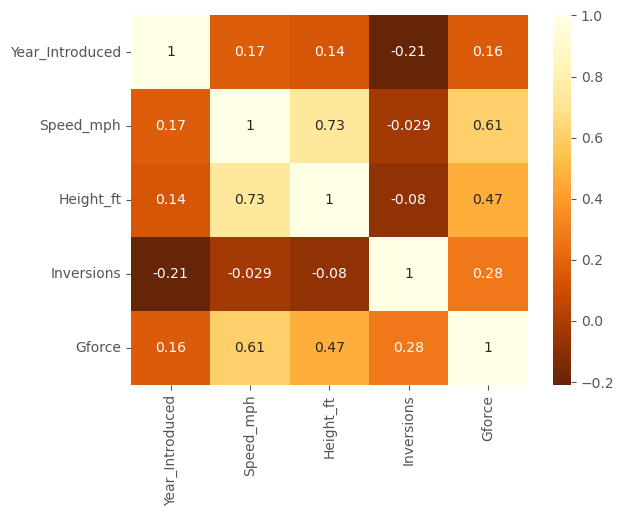

In [34]:
sns.heatmap(correlation_matrix, cmap='YlOrBr_r', annot=True)

## Step 5: Asking a Question about the data

(Answering the questions I/business have about the data using plot or statistic)

- What are the locations with the fastest rollercoasters?
- Which construction material of the rollercoaster gives best experiences (Gforce and Speed)

In [35]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
